In [3]:
#Aykırı Gözlem Analizi
#Aykırı Gözlem Yakalamak
import seaborn as sns
diamond = sns.load_dataset("diamonds")
df = diamond.copy()
df = df.select_dtypes(include = ["float64","int64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [67]:
df_table = df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

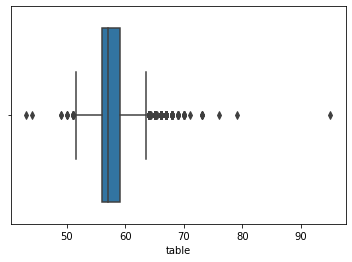

In [6]:
sns.boxplot(x = df_table);

In [8]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

In [9]:
Q1

56.0

In [10]:
Q3

59.0

In [11]:
IQR

3.0

In [12]:
alt_sinir = Q1 - 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [14]:
alt_sinir

51.5

In [15]:
ust_sinir

63.5

In [19]:
(df_table < alt_sinir) | (df_table > ust_sinir)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [26]:
aykiri_tf = (df_table < alt_sinir) | (df_table > ust_sinir)
aykiri_tf.head()

0    False
1    False
2     True
3    False
4    False
Name: table, dtype: bool

In [27]:
df_table[aykiri_tf]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [28]:
df_table[aykiri_tf].index

Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,   359,
       ...
       53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757, 53785],
      dtype='int64', length=605)

Aykırı Değer Problemini Çözmek
---------------------------------------------------

Silme

In [57]:
import pandas as pd
df_table = df["table"]

In [59]:
type(df_table)

pandas.core.series.Series

In [60]:
df_table = pd.DataFrame(df_table)

In [61]:
df_table.shape

(53940, 1)

In [63]:
t_df = df_table[~((df_table < (alt_sinir)) | (df_table > (ust_sinir))).any(axis = 1)]

In [65]:
t_df.shape

(53335, 1)

Ortalama ile Doldurma

In [68]:
#Aykırı Gözlem Analizi
#Aykırı Gözlem Yakalamak
import seaborn as sns
diamond = sns.load_dataset("diamonds")
df = diamond.copy()
df = df.select_dtypes(include = ["float64","int64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [69]:
df_table = df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [70]:
aykiri_tf.head()

0    False
1    False
2     True
3    False
4    False
Name: table, dtype: bool

In [72]:
df_table[aykiri_tf]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [73]:
 df_table.mean()

57.45718390804598

In [74]:
df_table[aykiri_tf] = df_table.mean()

<ipython-input-74-57ba1f56a480>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf] = df_table.mean()


In [75]:
df_table[aykiri_tf]

2        57.457184
91       57.457184
145      57.457184
219      57.457184
227      57.457184
           ...    
53695    57.457184
53697    57.457184
53756    57.457184
53757    57.457184
53785    57.457184
Name: table, Length: 605, dtype: float64



Baskılama Yöntemi

In [76]:
#Aykırı Gözlem Analizi
#Aykırı Gözlem Yakalamak
import seaborn as sns
diamond = sns.load_dataset("diamonds")
df = diamond.copy()
df = df.select_dtypes(include = ["float64","int64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [78]:
df_table = df["table"]
df_table[aykiri_tf]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [80]:
df_table[aykiri_tf] = alt_sinir

<ipython-input-80-e2f0da25fd88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf] = alt_sinir


In [81]:
df_table[aykiri_tf]

2        51.5
91       51.5
145      51.5
219      51.5
227      51.5
         ... 
53695    51.5
53697    51.5
53756    51.5
53757    51.5
53785    51.5
Name: table, Length: 605, dtype: float64

In [82]:
df_table[aykiri_tf] = ust_sinir

<ipython-input-82-2187c693b71f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf] = ust_sinir


In [83]:
df_table[aykiri_tf]

2        63.5
91       63.5
145      63.5
219      63.5
227      63.5
         ... 
53695    63.5
53697    63.5
53756    63.5
53757    63.5
53785    63.5
Name: table, Length: 605, dtype: float64